In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import matplotlib.pyplot as plt

In [5]:
data = df.drop('Purchased', axis = 1)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler() 

In [7]:
data_scaled = scaler.fit_transform(data)

print(data_scaled)

[[0.02380952 0.02962963]
 [0.4047619  0.03703704]
 [0.19047619 0.20740741]
 [0.21428571 0.31111111]
 [0.02380952 0.45185185]
 [0.21428571 0.31851852]
 [0.21428571 0.51111111]
 [0.33333333 1.        ]
 [0.16666667 0.13333333]
 [0.4047619  0.37037037]
 [0.19047619 0.48148148]
 [0.19047619 0.27407407]
 [0.04761905 0.52592593]
 [0.33333333 0.02222222]
 [0.         0.4962963 ]
 [0.26190476 0.48148148]
 [0.69047619 0.07407407]
 [0.64285714 0.08148148]
 [0.66666667 0.0962963 ]
 [0.71428571 0.1037037 ]
 [0.64285714 0.05185185]
 [0.69047619 0.25185185]
 [0.71428571 0.19259259]
 [0.64285714 0.05185185]
 [0.66666667 0.05925926]
 [0.69047619 0.03703704]
 [0.73809524 0.0962963 ]
 [0.69047619 0.11111111]
 [0.26190476 0.20740741]
 [0.30952381 0.02222222]
 [0.30952381 0.43703704]
 [0.21428571 0.9037037 ]
 [0.07142857 0.00740741]
 [0.23809524 0.21481481]
 [0.21428571 0.55555556]
 [0.4047619  0.08888889]
 [0.35714286 0.0962963 ]
 [0.28571429 0.25185185]
 [0.19047619 0.42222222]
 [0.21428571 0.11851852]


In [8]:
x_train = data_scaled
y_train = df['Purchased'].values

m,n = x_train.shape

print(m,n)

y_train = np.expand_dims(y_train, axis = 1)
y_train.shape

400 2


(400, 1)

In [9]:
oneHot = OneHotEncoder() 

oneHot.fit(y_train)
y_train = oneHot.transform(y_train).toarray()

y_train.shape

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(400, 2)

In [10]:
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32, [None, 2])

initializer = tf.initializers.he_normal()
W = tf.Variable(initializer(shape=(n,2), dtype=tf.float32))
b = tf.Variable(tf.zeros([2]))

In [11]:
Y_hat = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-2).minimize(cost)
init = tf.global_variables_initializer()

num_epochs = 900

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    cost_history, accuracy_history = [],[]
    
    for epoch in range(num_epochs):
        cost_per_epoch = 0
        
        sess.run(optimizer, feed_dict = {X: x_train, Y: y_train})
        
        c = sess.run(cost, feed_dict = {X : x_train, Y : y_train}) 
        
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
        
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x_train, Y : y_train}) * 100)
        
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1]) + "Accuracy: "+str(accuracy_history[-1]))
            
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
    
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
    
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Cost: 546.0270080566406Accuracy: 64.24999833106995
Epoch 200 Cost: 545.7970275878906Accuracy: 64.24999833106995
Epoch 300 Cost: 545.7195129394531Accuracy: 64.24999833106995
Epoch 400 Cost: 545.6806335449219Accuracy: 64.24999833106995
Epoch 500 Cost: 545.6573791503906Accuracy: 64.24999833106995
Epoch 600 Cost: 545.6416931152344Accuracy: 64.24999833106995
Epoch 700 Cost: 545.6306457519531Accuracy: 64.24999833106995
Epoch 800 Cost: 545.6220703125Accuracy: 64.24999833106995

Accuracy: 64.24999833106995 %


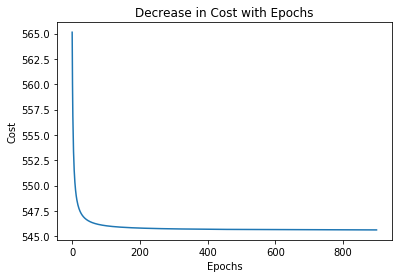

In [14]:
plt.plot(list(range(num_epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

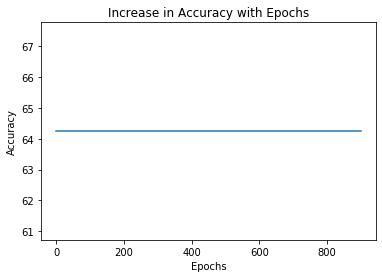

In [15]:
plt.plot(list(range(num_epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show()